https://brew.sh/

In [1]:
!pip install opencv-python

     |████████████████████████████████| 42.6 MB 7.6 MB/s            


In [2]:
!pip install opencv-contrib-python==3.4.2.16

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.16 (from versions: 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.16


In [3]:
!pip install scikit-image

     |████████████████████████████████| 13.0 MB 8.4 MB/s            
     |████████████████████████████████| 3.3 MB 14.5 MB/s            
     |████████████████████████████████| 175 kB 11.1 MB/s            
     |████████████████████████████████| 4.3 MB 13.0 MB/s            


In [4]:
!pip install Image

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 7.9 MB 3.5 MB/s            
     |████████████████████████████████| 42 kB 3.3 MB/s             
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=9984261216ce08444b32b78e84100437112ac9a38d7f2afcdf278ccdff5ce498
  Stored in directory: /Users/tatsuya.fujisaki/Library/Caches/pip/wheels/ac/30/5c/a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built Image


In [5]:
!pip install scipy

### **Image transformation**

__An image transform can be applied to an image to convert it from one domain to another. Viewing an image in domains such as frequency or Hough space enables the identification of features that may not be as easily detected in the spatial domain. Common image transforms include:__

### Import libraries

In [6]:
import skimage
import cv2
import numpy as np

from PIL import Image, ImageFilter
from sklearn.feature_extraction import image

import matplotlib.pyplot as plt

### Load and read image data from our local disk

https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

Image source: https://unsplash.com/photos/Vkau25v1L5Q

In [7]:
img_stork = Image.open('datasets/bird.jpeg')

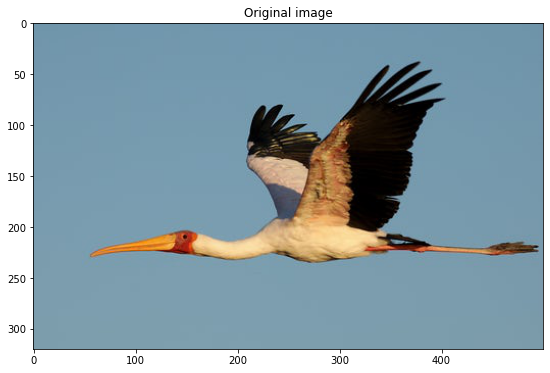

In [8]:
plt.figure(figsize=(12, 6))

plt.imshow(img_stork)
plt.title('Original image')
plt.show()

### Format of image

In [9]:
img_stork.format, img_stork.mode, img_stork.size

('JPEG', 'RGB', (500, 320))

### Convert into grayscale
Grayscale images are smaller in size and may be enough for your image processing tasks

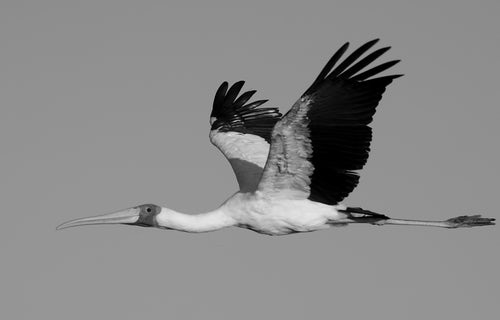

In [10]:
gs_image = img_stork.convert(mode='L')

gs_image

In [11]:
gs_image.size

(500, 320)

### Resize
* __By using thumbnail__

To feed a large number of images into ML models, you will need to standardize their sizes

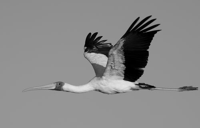

In [12]:
gs_image.thumbnail((200, 200))

gs_image

In [13]:
gs_image.size, img_stork.size

((200, 128), (500, 320))

* __By using resize function__

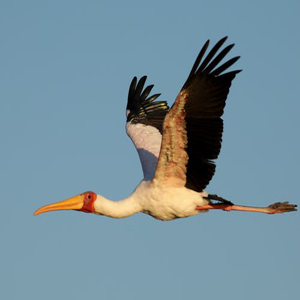

In [14]:
img_resize = img_stork.resize((300, 300))

img_resize

In [15]:
img_resize.size

(300, 300)

## Flip image

### Original image

In [16]:
hoz_flip = img_stork.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = img_stork.transpose(Image.FLIP_TOP_BOTTOM)

### Horizontal flip

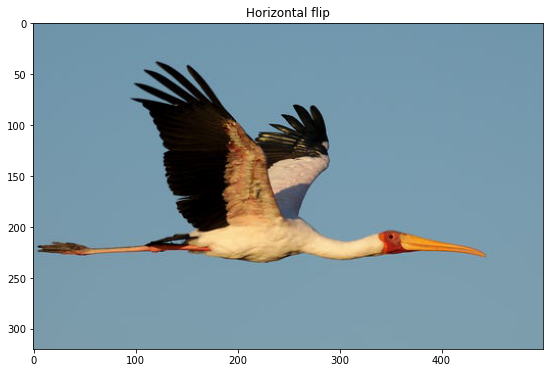

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Horizontal flip')
plt.imshow(hoz_flip)

plt.show()

### Vertical flip

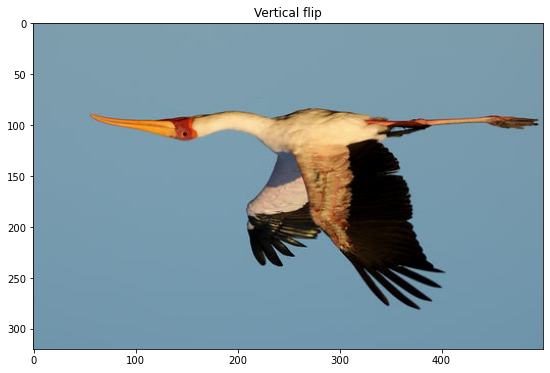

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Vertical flip')
plt.imshow(ver_flip)

plt.show()

### Converted the original image into numpy N-D arrays

In [19]:
img_stork_arr = np.array(img_stork)

type(img_stork_arr)

numpy.ndarray

### Shape of N-D array

In [20]:
img_stork_arr.shape

(320, 500, 3)

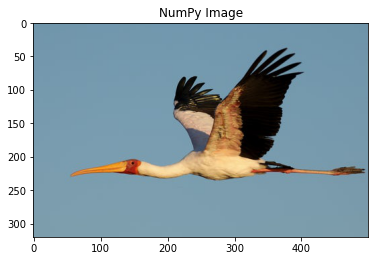

In [21]:
plt.figure (figsize = (6, 6))
plt.title("NumPy Image")
plt.imshow(img_stork_arr, cmap = 'gray')

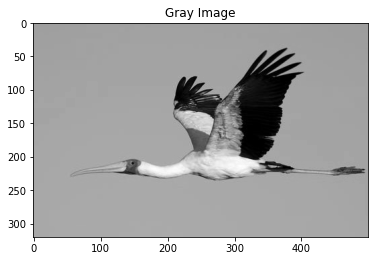

In [22]:
from skimage.color import rgb2gray

img_stork_arr_gray = rgb2gray(img_stork_arr)

plt.figure (figsize = (6,6))
plt.title("Gray Image")
plt.imshow(img_stork_arr_gray, cmap = 'gray')

In [23]:
img_stork_arr_gray.shape

(320, 500)

#### View a part of the array
Each of the 20 cells here is itself a list of 3 elements representing the 3 channels of the color image

In [24]:
img_stork_arr[100][200:220]

array([[118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [122, 155, 172],
       [114, 151, 170],
       [117, 159, 181],
       [115, 157, 179],
       [120, 155, 174],
       [118, 142, 154],
       [  0,  10,  16],
       [  0,   1,   4],
       [  7,   6,  11],
       [  6,   7,   9],
       [  7,   9,   8],
       [  8,   9,   4]], dtype=uint8)

In [25]:
img_stork_arr_gray[100][200:220]

array([0.58238196, 0.58238196, 0.58238196, 0.58238196, 0.58238196,
       0.58238196, 0.58238196, 0.58238196, 0.5851498 , 0.56669569,
       0.5947498 , 0.58690667, 0.58404863, 0.54025569, 0.03257882,
       0.00393647, 0.02577647, 0.02718314, 0.03334471, 0.03304706])

In [26]:
from skimage.transform import resize

stork_resized = resize(img_stork_arr, (224, 224), anti_aliasing=True)

stork_resized.shape

(224, 224, 3)

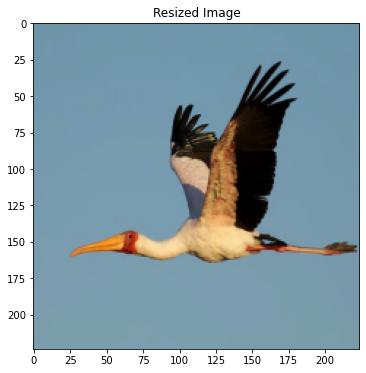

In [27]:
plt.figure (figsize = (6, 6))
plt.title("Resized Image")
plt.imshow(stork_resized, cmap = 'gray')

### Let's looks how many patches in a single image of (64 * 64)

In [28]:
img_stork_arr.shape

(320, 500, 3)

#### Creating patches out of the image
The number of patches = (320-64+1)*(500-64+1) = 112309

In [29]:
patches = image.extract_patches_2d(img_stork_arr, (64, 64))

patches.shape

(112309, 64, 64, 3)

### Visualizing the patches

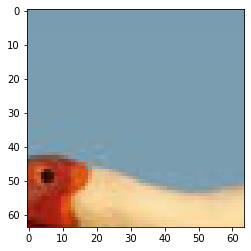

In [46]:
plt.imshow(patches[70500])
plt.show()

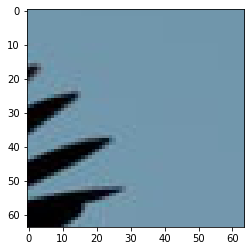

In [31]:
plt.imshow(patches[9990])
plt.show()

### In this example image is taken from skimage dataset library

https://peerj.com/articles/453/

In [32]:
from skimage import data, io, filters

### Load image data from skimage datasets

In [33]:
image = data.coins()
print(image)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


### Shape of image

In [34]:
image.shape

(303, 384)

### Original image

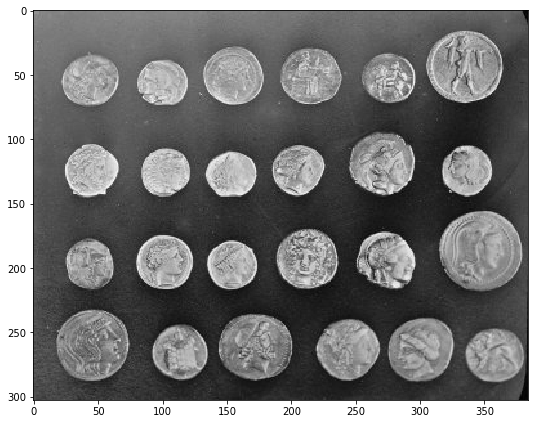

In [35]:
plt.figure(figsize=(12, 6))
io.imshow(image)

plt.show()

### Filter the image by the help of edges

In [36]:
edges = filters.sobel(image)

print(edges)

[[0.22261811 0.22580966 0.04256528 ... 0.01675295 0.00765711 0.0202113 ]
 [0.22752914 0.17208326 0.04307036 ... 0.03683979 0.00765711 0.01180548]
 [0.10007686 0.06139791 0.02499519 ... 0.084638   0.00490196 0.02018751]
 ...
 [0.01386484 0.03114192 0.02949335 ... 0.01669548 0.00588235 0.00876889]
 [0.02752092 0.04030354 0.0335059  ... 0.00571662 0.00980392 0.00438445]
 [0.02941176 0.05787636 0.0417099  ... 0.00490196 0.00876889 0.00554594]]


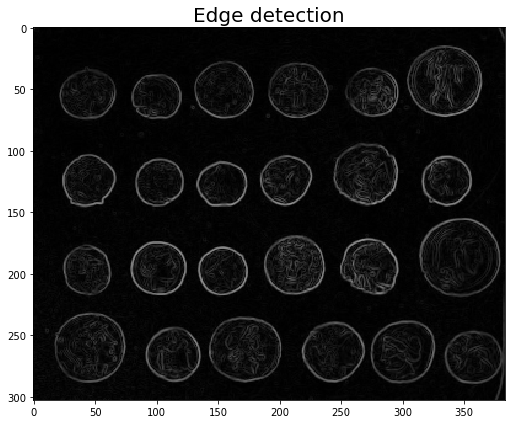

In [37]:
plt.figure(figsize=(12, 6))
plt.title('Edge detection', fontsize=20)
io.imshow(edges)

plt.show()

### Select local maxima

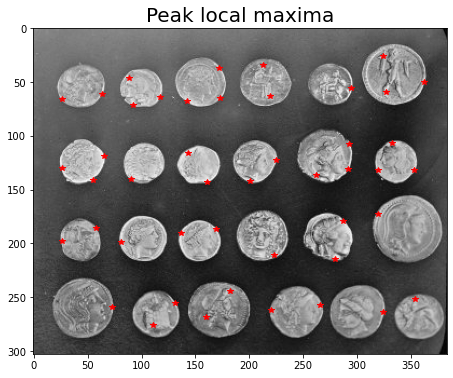

In [38]:
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

fig, axes = plt.subplots(figsize=(12, 6))
axes.imshow(image, cmap=plt.cm.gray)

axes.plot(coordinates[:, 1], coordinates[:,0], 'r*')
axes.set_title('Peak local maxima', fontsize=20)

plt.show()

In [39]:
pisa1 = cv2.imread('datasets/leaning_pisa_1.jpg')

pisa1.shape

(426, 640, 3)

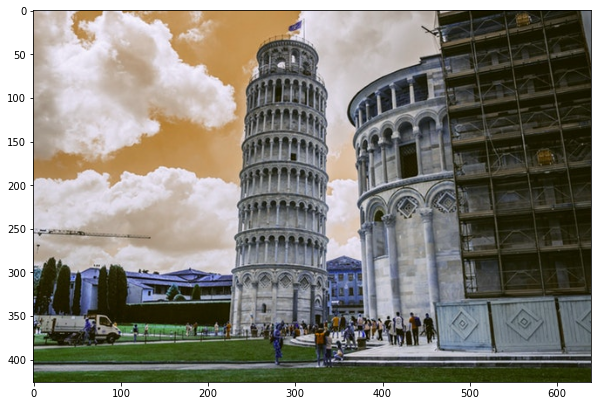

In [40]:
plt.figure(figsize=(10, 10))  

plt.imshow(pisa1)

In [50]:
gray1 = cv2.cvtColor(pisa1, cv2.COLOR_BGR2GRAY)

In [51]:
sift = cv2.xfeatures2d.SIFT_create()
sift

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
keypoints1 = sift.detect(gray1, None)

keypoints1

In [52]:
pisa1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None)

cv2.imwrite('sift_pisa_keypoints.jpg', pisa1)

NameError: name 'keypoints1' is not defined

In [ ]:
sift_pisa_keypoints = skimage.io.imread('sift_pisa_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(sift_pisa_keypoints, cmap = 'gray');

In [ ]:
pisa_rich1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('rich_sift_pisa_keypoints.jpg', pisa_rich1)

In [ ]:
rich_sift_keypoints = skimage.io.imread('rich_sift_pisa_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(rich_sift_keypoints, cmap = 'gray');

In [ ]:
kp1, des1 = sift.compute(gray1, keypoints1)

des1.shape

In [ ]:
pisa2 = cv2.imread('datasets/leaning_pisa_2.jpg')

pisa2.shape

In [ ]:
plt.figure(figsize=(10, 10))  

plt.imshow(pisa2);

In [ ]:
gray2 = cv2.cvtColor(pisa2, cv2.COLOR_BGR2GRAY)

kp2, des2 = sift.detectAndCompute(gray2, None)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches = bf.match(des1, des2)

In [ ]:
N_MATCHES = 20

match_img = cv2.drawMatches(
    gray1, kp1,
    gray2, kp2,
    matches[:N_MATCHES], gray2.copy(), flags=0)

plt.figure(figsize=(20, 10))
plt.imshow(match_img);